In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount("/content/drive") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!git clone https://github.com/Nikunj1729/free-spoken-gujarati-digit-dataset.git

Cloning into 'free-spoken-gujarati-digit-dataset'...
remote: Enumerating objects: 3340, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3340 (delta 11), reused 7 (delta 1), pack-reused 3312
Receiving objects: 100% (3340/3340), 282.13 MiB | 26.42 MiB/s, done.
Resolving deltas: 100% (1317/1317), done.
Checking out files: 100% (1959/1959), done.


In [2]:
cd free-spoken-gujarati-digit-dataset/

/content/free-spoken-gujarati-digit-dataset


In [ ]:

files_path = '/content/free-spoken-gujarati-digit-dataset' #'/content/drive/MyDrive/audd saved files/gujrati dataset'
if not os.path.exists("processed_data"):
  os.mkdir("processed_data")
x=[]
y=[]
Total=23500
count=0
for i in range(5):
  j = "R"+str(i+1)
  for k in os.listdir(j):
    if ".DS_" in k:
      continue 
    for t in os.listdir(j+"/"+k):
      if ".DS_" in t:
        continue 
      print(count,t)
      x.append((j+"/"+k+"/"+t))
      y.append(int(t.split("D")[1][0]))
      count+=1
    if count%300==0:
      print(Total-count)
  
x=np.array(x)
y=np.array(y)
np.save(files_path+"/x",x)
np.save(files_path+"/y",y)

# Data Augmentation Techniques

###1. Noise Injection

References:



1.   https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
2.   https://github.com/sleekEagle/audio_processing/blob/master/mix_noise.py

In [41]:
def noise_injection(files_path):
  signal, sr = librosa.load(files_path)
  RMS=math.sqrt(np.mean(signal**2))
  STD_n = RMS
  noise=np.random.normal(0, STD_n, signal.shape[0])

  signal_noise = signal+noise
  return signal_noise,sr

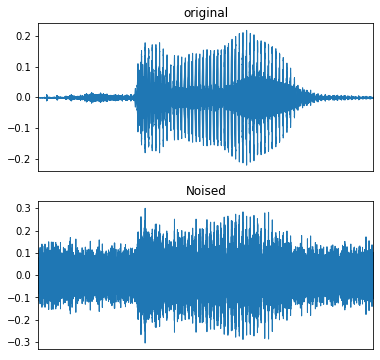

In [47]:
# Noise injection testing

filepath = '/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav'
# original audio
signal, sr = librosa.load(filepath)

# noised audio
noised,sr2 = noise_injection(filepath)


plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
librosa.display.waveplot(signal.astype('float'), sr=sr,x_axis=None)
plt.title('original')
plt.subplot(2, 1, 2)
librosa.display.waveplot(noised.astype('float'), sr=sr2,x_axis=None)
plt.title('Noised')
plt.show()




"noised = noise_injection('/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav',4)\nlibrosa.display.waveplot(noised.astype('float'), sr=sr,x_axis=None)"

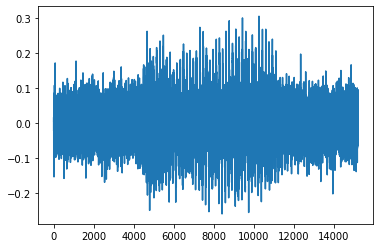

In [42]:
import math
import matplotlib.pyplot as plt
from IPython.display import Audio


signal, sr = librosa.load('/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav')

noised,sr2 = noise_injection('/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav')

plt.plot(noised)

"""noised = noise_injection('/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav',4)
librosa.display.waveplot(noised.astype('float'), sr=sr,x_axis=None)"""

In [43]:
import IPython
IPython.display.Audio(data=noised, rate=sr2)